## Project Overview

### Which campus in the US had the highest violent crime rate in 2015 (as a percentage)? 

Will produce a bar chart with the y axis the violent crime rate and the x axis the campus name.

#### crimes_by_campus_2015_usa.csv

The file contains information about how many incidents of each different crime category were reported in 2015 at different university campuses in the USA. For each US state, it contains:

- the names of unversities in that state
- the names of the different campuses for each university
- the number of students enrolled at each campus
- the number of violent crimes at each campus
- the number of murders and nonnegligent manslaughter at each campus
- the number of rapes (revised definition) at each campus
- the number of rapes (legacy definition) at each campus 
- the number of robberies at each campus
- the number of aggravated assaults at each campus
- the number of property crimes at each campus
- the number of burglaries at each campus
- the number of larceny thefts at each campus
- the number of motor vehicle thefts at each campus
- the number of arsens at each campus

The columns for rape (revised) and rape (legacy) have some missing data in which the number of incidents of that type are blank for some campuses. 

Arson also has some missing data that is blank for a few campuses as well. 

There are some university campuses with missing data regarding the number of students enrolled which are blank. Some universities do not have a corresponding campus Some campus names are missing as well and are blank. 

#### Being a university student myself, learning these stats and the number of various crimes can be scary, but also very useful when someone is picking which university campus they will want to apply to


#### Explain how you used what you learned about systematic program design to solve the problem. What design choices did you have to make? Why did you make the choices that you made?

Systemic program design taught me to separate the overall problem into smaller parts to each solve an individual task that would then work together to solve the overall problem. To solve my problem, I decided that voilent crime rate would be calculated by number of voilent crimes divided by number of students enrolled *100. This meant creating Optionals that would account for the missing values in the csv for campus names or students enrolled. I also defined each Campus name and its respective nummber of students enrolled and voilent crime numbers as a Compound so that after the function calculated the voilent crime rates for each campus, the function could then return the campus name with the highest voilent crime rate. I also used the Composition rule to filter the list, omitting any Compounds with missing campus names or number of students enrolled. Thus campuses with missing values were omitted from the plotted bar chart.  

#### Describe how you solved the problem. Provide visuals if possible, and definitely provide the graph or chart(s) that your program created.

In [1]:
from cs103 import *
from typing import NamedTuple, List, Optional
import csv

##################
# Data Definitions

Campus = Optional[str]
# interp. a campus name. None means that the campus name is not provided. 

C1="Berkely"
C2="Birmingham"
C3=None

#template rules used: out of (2 cases), atomic distinct and atomic non-distinct

def fn_for_campus (c: Campus)-> ...:
    if c is None:
        return...
    else:
        return... (c)
    
StuEnrol = Optional [int]
#interp. the number of students enrolled at a campus. None means that the number of students enrolled is not provided.

S1=13144
S2=18698
S3=None

#template rules used: out of (2 cases), atomic distinct and atomic non-distinct

def fn_for_stu_enrol (s:StuEnrol)-> ...:
    if s is None:
        return...
    else:
        return... (s)
    
    
CampusVCrime = NamedTuple ("CampusVCrime",[('campus', Campus),
                                          ('enrol', StuEnrol),
                                          ('v_crime', int)]) #in range [0,...)
 
#interp. the violent crime rate on US campuses in 2015, with its campus name, number of students enrolled, and the number of violent crimes. 
  
CV1= CampusVCrime('Jonesboro', 13144, 11)
CV2= CampusVCrime('Beebe', 4140, 0)
CV3= CampusVCrime('Dartmouth', 9111, 14)
CV4= CampusVCrime('Harbor Campus, Boston', 16756, 4)
CV5= CampusVCrime('Medical Center6', None, 2)
CV6= CampusVCrime(None, 3103, 5)

#template based on compound (3 fields) and reference rule
                        
def fn_for_campus_v_crime (cv: CampusVCrime) -> ...:
    return ... (fn_for_campus(cv),
                fn_for_stu_enrol(cv),
                cv.v_crime)

# List[CampusVCrime]
# interp. a list of 2015 US campus violent crime data 

LOCV0 = []
LOCV1 = [CV1, CV2]

#template based on arbritrary-sized and reference rule

@typecheck
def fn_for_locv(locv: List[CampusVCrime]) -> ...:
    #description of the acc
    acc=... #type:...
    for cv in locv:
        acc = ... (fn_for_campus_v_crime(cv), acc)
    return ... (acc)


<>:21: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<>:36: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<>:55: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<>:72: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<>:73: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<>:21: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<>:36: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<>:55: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<>:72: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<>:73: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<ipython-input-1-638e6d9f246e>:21: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
  return... (c)
<ipython-input-1-638e

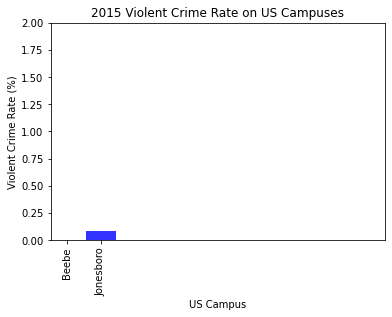

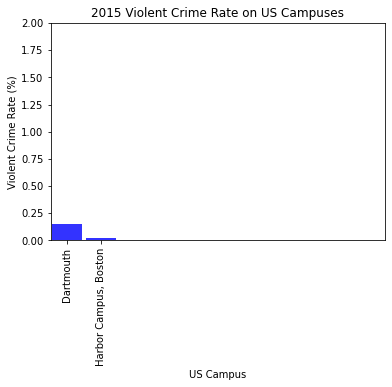

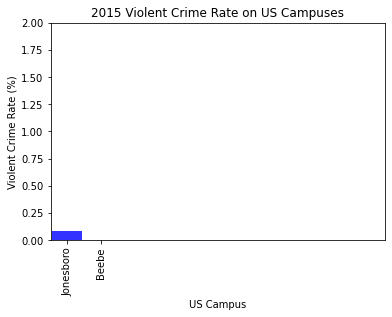

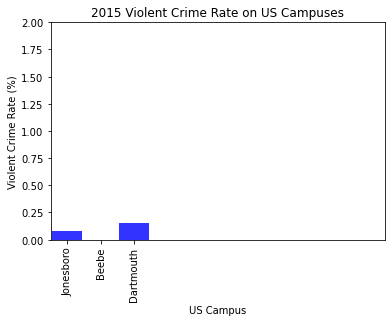

25 of 25 tests passed


In [2]:
import matplotlib.pyplot as plt

@typecheck
def main(filename: str) -> None: 
    """
    Reads the file from given filename and creates a bar chart showing the 
    voilent crime rates in 2015 on different US campuses (as a %)
    """
    # Template from HtDAP, based on composition
    return plot_bar_chart(read(filename))

@typecheck
def read(filename: str) -> List[CampusVCrime]:
    """    
    reads information from the specified file and returns a list of 2015 US campus violent crime data 
    """
    #return []  #stub
    # Template from HtDAP
    # locv contains the result so far
    locv = [] # type: List[CampusVCrime]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip first header line

        for row in reader:
            cv = CampusVCrime(parse_camp(row[2]), parse_enrol(row[3]), parse_int(row[4]))
            locv.append(cv)
    
    return locv

@typecheck
def plot_bar_chart(locv: List[CampusVCrime]) -> None:
    """
    creates a bar chart showing the voilent crime rates 
    in 2015 on different US campuses (as a %) and returns None
    """
    # return None #stub
    # Template from visualization
    filter_for_crime_rate = crime_rate (locv)
    rate = get_crime_rates (filter_for_crime_rate)

    bar_width = 9

    # the x-coord for the middle of each of the bars for the bar chart
    middle_of_bars = produce_num_sequence(filter_for_crime_rate, 5, bar_width + 1)

    # the opacity for the bars. It must be between 0 and 1, 
    # and higher numbers are more opaque (darker)
    opacity = 0.8

    # create the first bar chart
    rects1 = plt.bar(middle_of_bars, 
                     rate,                   
                     bar_width,
                     alpha=opacity,                 
                     color='b')                     

    # set the labels for the x-axis, y-axis, and plot title
    plt.xlabel('US Campus')
    plt.ylabel('Violent Crime Rate (%)')
    plt.title('2015 Violent Crime Rate on US Campuses')

    # set the range for the axes
    # [x-min, x-max, y-min, y-max]
    plt.axis([0,100,0,2])

    # set the x-coordinate for positioning the labels. Here, we want 
    # each label to be in the middle of each bar
    x_coord_labels = middle_of_bars

    # set the labels for each 'tick' on the x-axis
    tick_labels = get_campus_names (locv)

    plt.xticks(x_coord_labels, tick_labels, rotation='vertical')

    # show the plot
    plt.show()
    
    return None


@typecheck
def crime_rate (locv: List[CampusVCrime]) -> List[CampusVCrime]:
    """
    returns all CampusVCrime with calculable crime rates
    if campus name (cv.campus) or the number of students enrolled (cv.enrol) are missing, these values are not included
    """
    #return List[CampusVCrime] #stub
    #template from CampusVCrime
    complete_list = [] #type: List[CampusVCrime]
    for cv in locv:
        if is_enrol(cv.enrol)== True and is_camp(cv.campus)==True: 
            complete_list.append(cv)
    return complete_list

@typecheck
def is_enrol(s: StuEnrol) -> bool:
    """
    return True if the number of students enrolled is given, False otherwise
    """
    #return False #stub
    # template from CampusVCrime
    if s is None:
        return False
    else:
        return True

@typecheck
def is_camp(c: Campus) -> bool:
    """
    return True if the campus name is given, False otherwise
    """
    #return False #stub
    # template from CampusVCrime
    if c is None:
        return False
    else:
        return True

@typecheck
def parse_enrol(s: str)-> StuEnrol:
    """
    Given a string which is either blank or the number of students enrolled, returns the corresponding StuEnrol.
    """
    #return StuEnrol #stub
    #template based on atomic non-distinct
    if s == "":
        return None
    else:
        s=parse_int(s)
        return s
    

@typecheck
def parse_camp(c: str)-> Campus: 
    """
    Given a string which is either blank or a campus name, returns the corresponding Campus. 
    """
    #return Campus #stub
    #template based on atomic non-distinct
    if c == "":
        return None
    else:
        return c

@typecheck
def get_crime_rate (cv: CampusVCrime) -> float:
    """
    return the violent crime rate as a percentage for cv
    """
    #return "" #stub
    # template from CampusVCrime
    return (cv.v_crime/cv.enrol)*100

@typecheck
def get_crime_rates (locv: List[CampusVCrime]) -> List [float]:
    """
    return a list of the violent crime rates from locv 
    """
    # return [] #stub
    #template from List[CampusVCrime]
    #acc contains the violent crime rate for campuses in locv that we have seen
    acc=[] #type: List[float]
    for cv in locv:
        if is_enrol(cv.enrol)== True and is_camp(cv.campus)==True:
            acc.append(get_crime_rate(cv))
    return acc

@typecheck
def get_campus_names (locv: List[CampusVCrime]) -> List[str]:
    """
    returns a list of the campus names in locv
    """
    # return [] #stub
    # template from List[CampusVCrime]
    # acc contains the names of campuses in locv that we have seen so far
    acc=[] #type: List[str]
    for cv in locv:
        if is_enrol(cv.enrol)== True and is_camp(cv.campus)==True:
            acc.append(cv.campus)
    return acc

@typecheck
def produce_num_sequence(values: List[CampusVCrime], initial: float, gap: float) -> List[float]:
    """
    Produce a list of numbers like [initial, initial + gap, initial + 2*gap, ...] of the same
    length as values, e.g., to give alignment coordinates for a plot. The number
    of numbers in the list is equal to len(values). The first value is initial. The gap between values
    is gap.
    
    E.g., [5,15,25,35,45,55,65,75] for 8 values, initial == 5, and gap == 10.
    """
    #return []  #stub
    # Template from List[CampusVCrime] with two additional parameters
    
    # nums is the numbers for the values seen so far
    nums = []  # type: List[int]
    
    # next_num is the next number to use
    next_num = initial
    
    for val in values:
        nums.append(next_num)
        next_num = next_num + gap
    
    return nums   

# Begin testing
start_testing()
    
# Examples and tests for main
expect(main('crimes_by_campus_2015_usa_test1.csv'), None)
expect(main('crimes_by_campus_2015_usa_test2.csv'), None)

# Examples and tests for read
expect(read('crimes_by_campus_2015_usa_test1.csv'), [CV2, CV1])
expect(read('crimes_by_campus_2015_usa_test2.csv'), [CV3, CV4, CV5])

# Examples and tests for plot_bar_chart
expect(plot_bar_chart([CV1,CV2]), None)
expect(plot_bar_chart([CV1,CV2,CV3]), None)

# Examples and tests for produce_num_sequence
expect(produce_num_sequence([], 5, 10), [])
expect(produce_num_sequence([CV1, CV2, CV5], 5, 10), [5, 15, 25])
expect(produce_num_sequence([CV1, CV2, CV3], 0.5, 3.5), [0.5, 4.0, 7.5])

#Examples and tests for crime_rate
expect(crime_rate([CV1,CV2]), [CV1,CV2])
expect(crime_rate([CV1,CV5,CV3]), [CV1,CV3])

#Examples and tests for is_enrol
expect(is_enrol(1),True)
expect(is_enrol(None),False)

#Examples and tests for is_camp
expect(is_camp("Dartmouth"),True)
expect(is_camp(None),False)

#Examples and tests for parse_camp
expect(parse_camp(""), None)
expect(parse_camp("Dartmouth"), "Dartmouth")

#Examples and tests for parse_enrol
expect(parse_enrol(""), None)
expect(parse_enrol("37"), 37)

#Examples and tests for get_crime_rate
expect(get_crime_rate(CV1), 0.08368837492391966)
expect(get_crime_rate(CV3), 0.1536604104928109)

#Examples and tests for get_crime_rates
expect(get_crime_rates([CV1,CV2]), [0.08368837492391966,0])
expect(get_crime_rates([CV1,CV5,CV3]), [0.08368837492391966,0.1536604104928109])

#Examples and tests for get_campus_names
expect(get_campus_names([CV1]), ["Jonesboro"])
expect(get_campus_names([CV1,CV3]), ["Jonesboro", "Dartmouth"])


# show testing summary
summary()

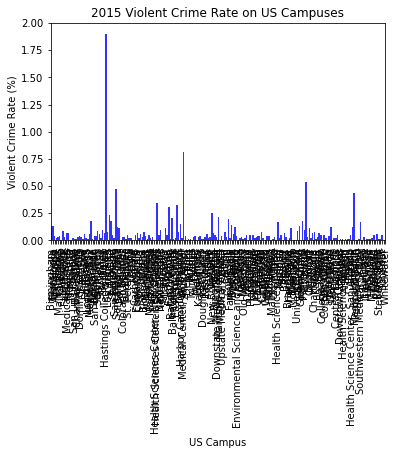

In [4]:
main('crimes_by_campus_2015_usa.csv')

#### Discuss which part of the project was the most difficult for you and why

Designing my optional functions were a bit tricky because I first had to convert both my optionals into None type data values while also accounting that one of my Optionals needed to be converted from a string into an integer to be used in the Optional data definition. 

#### Provide examples of ways in which you could use your systematic programming design skills to solve problems in your chosen topic area in the future.

- Could extend these systemic programming skills to calculate voilent crime rates on university campuses worldwide as I believe these should be factors taken into account when choosing campuses to attend as student safety should always be number 1 before all else. 
- Could extend these skills to calculate any type of crime rate on campuses, be it murder, robbery, etc
